## Depth First Search Algorithm

Depth first Search or Depth first traversal is a recursive algorithm for searching all the vertices of a graph or tree data structure. Traversal means visiting all the nodes of a graph.

A standard DFS implementation puts each vertex of the graph into one of two categories:


*   Visited
*   Not visited

The purpose of the algorithm is to mark each vertex as visited while avoiding cycles.

The DFS algorithm works as follows:

1. Start by putting any one of the graph's vertices on top of a stack.
2. Take the top item of the stack and add it to the visited list.
3. Create a list of that vertex's adjacent nodes. Add the ones which aren't in the visited list to the top of the stack.
4. Keep repeating steps 2 and 3 until the stack is empty.


In [1]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    print("Visiting", start)
    for next in graph[start]:
        if next not in visited:
            dfs(graph, next, visited)
    return visited

In [2]:
graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}

dfs(graph, '0')

Visiting 0
Visiting 2
Visiting 1
Visiting 4
Visiting 3


['0', '2', '1', '4', '3']

**Optimized DFS:**

This version of DFS is optimized because:

1. This version uses a `set` to track visited nodes, allowing for constant-time (O(1)) membership checks, which speeds up the process of determining whether a node has already been visited.

2. By subtracting the `visited` set from `graph[start]`, your version directly excludes already-visited nodes, avoiding unnecessary checks during iteration.


In [3]:
def dfs_optimized(graph, start, visited=None):
  if visited is None:
    visited = set()
  visited.add(start)
  print("Visiting", start)
  for next in graph[start] - visited:
    dfs_optimized(graph, next, visited)
  return visited

In [4]:
graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}

dfs_optimized(graph, '0')

Visiting 0
Visiting 1
Visiting 4
Visiting 3
Visiting 2
Visiting 3
Visiting 2


{'0', '1', '2', '3', '4'}

The time complexity of the DFS algorithm is represented in the form of `O(V + E)`, where `V` is the number of nodes and `E` is the number of edges.

The space complexity of the algorithm is `O(V)`.

**Visualization:**

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import deque

In [6]:
graph = {
    '0': set(['1', '2', '5']),
    '1': set(['0', '3', '4', '6']),
    '2': set(['0', '4', '7']),
    '3': set(['1', '8']),
    '4': set(['1', '2', '3', '9']),
    '5': set(['0', '6', '10']),
    '6': set(['1', '5', '7', '11']),
    '7': set(['2', '6', '8', '12']),
    '8': set(['3', '7', '13']),
    '9': set(['4', '14']),
    '10': set(['5']),
    '11': set(['6']),
    '12': set(['7']),
    '13': set(['8']),
    '14': set(['9']),
}

In [7]:
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

In [8]:
def dfs_with_steps(graph, start):
    visited = set()
    steps = []

    def dfs(node):
        visited.add(node)
        steps.append({
            'node': node,
            'visited': visited.copy(),
            'current_edge': None,
            'event': 'visit'
        })

        for neighbor in graph[node]:
            if neighbor not in visited:
                steps.append({
                    'node': node,
                    'next_node': neighbor,
                    'visited': visited.copy(),
                    'current_edge': (node, neighbor),
                    'event': 'traverse'
                })
                dfs(neighbor)

    dfs(start)
    return steps

In [9]:
traversal_steps = dfs_with_steps(graph, '0')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

node_colors = {
    'unvisited': 'lightblue',
    'visiting': 'orange',
    'visited': 'lightgreen'
}

edge_colors = {
    'unvisited': 'gray',
    'traversing': 'red',
    'traversed': 'green'
}

<Figure size 1200x800 with 0 Axes>

In [10]:
def update(frame):
    plt.clf()
    step = traversal_steps[frame]
    current_node = step['node']
    visited_nodes = step['visited']
    current_edge = step.get('current_edge')
    event = step['event']

    node_color_map = []
    for node in G.nodes():
        if node == current_node:
            node_color_map.append(node_colors['visiting'])
        elif node in visited_nodes:
            node_color_map.append(node_colors['visited'])
        else:
            node_color_map.append(node_colors['unvisited'])

    edge_color_map = []
    for u, v in G.edges():
        if current_edge and ((u, v) == current_edge or (v, u) == current_edge):
            edge_color_map.append(edge_colors['traversing'])
        elif u in visited_nodes and v in visited_nodes:
            edge_color_map.append(edge_colors['traversed'])
        else:
            edge_color_map.append(edge_colors['unvisited'])

    nx.draw(G, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=2, node_size=700, font_size=18,
            font_weight='bold')

    plt.title(f"DFS Traversal - Step {frame+1}/{len(traversal_steps)}", fontsize=16)

    if event == 'visit':
        description = f"Visiting node: {current_node}"
    else:
        description = f"Traversing from {current_node} to {step['next_node']}"

    plt.figtext(0.5, 0.02, description,
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['unvisited'], markersize=15, label='Unvisited Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visiting'], markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visited'], markersize=15, label='Visited Node'),
        plt.Line2D([0], [0], color=edge_colors['unvisited'], lw=2, label='Unvisited Edge'),
        plt.Line2D([0], [0], color=edge_colors['traversing'], lw=2, label='Current Edge'),
        plt.Line2D([0], [0], color=edge_colors['traversed'], lw=2, label='Traversed Edge')
    ]

    plt.legend(handles=legend_elements, loc='upper right')



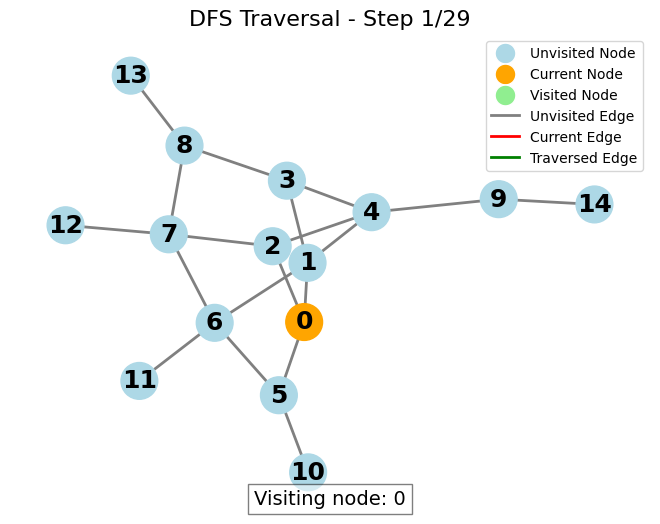

In [11]:
ani = FuncAnimation(plt.gcf(), update, frames=len(traversal_steps), interval=1000, repeat=True)

ani.save('dfs_traversal.mp4', writer='ffmpeg', fps=1)

## Breadth First Search Algorithm

Traversal means visiting all the nodes of a graph. Breadth First Traversal or Breadth First Search is a recursive algorithm for searching all the vertices of a graph or tree data structure.

A standard BFS implementation puts each vertex of the graph into one of two categories:



*   Visited
*   Not visited


The purpose of the algorithm is to mark each vertex as visited while avoiding cycles.

The algorithm works as follows:

1. Start by putting any one of the graph's vertices at the back of a queue.
2. Take the front item of the queue and add it to the visited list.
3. Create a list of that vertex's adjacent nodes. Add the ones which aren't in the visited list to the back of the queue.
4. Keep repeating steps 2 and 3 until the queue is empty.

The graph might have two different disconnected parts so to make sure that we cover every vertex, we can also run the BFS algorithm on every node

In [12]:
from collections import deque

In [13]:
def bfs(graph, start):
    visited = []
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print("Visiting", node)
            visited.append(node)
            queue.extend(graph[node])

    return visited

In [14]:
graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}

bfs(graph, '0')

Visiting 0
Visiting 2
Visiting 1
Visiting 4
Visiting 3


['0', '2', '1', '4', '3']

**Optimized BFS:**

This version of BFS is optimized:

1. `visited` is a set. Checking membership (`if node not in visited`) in a set
   is faster because it's implemented as a hash table, resulting in \(O(1)\) time complexity.

2. This version avoids redundancy by adding into the queue only the unvisited nodes `queue.extend(graph[node] - visited)`.

In [15]:
from collections import deque

In [16]:
def bfs_optimized(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print("Visiting", node)
            visited.add(node)
            queue.extend(graph[node] - visited)

    return visited

In [17]:
graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}

bfs_optimized(graph, '0')

Visiting 0
Visiting 1
Visiting 2
Visiting 4
Visiting 3


{'0', '1', '2', '3', '4'}

The time complexity of the BFS algorithm is represented in the form of `O(V + E)`, where `V` is the number of nodes and `E` is the number of edges.

The space complexity of the algorithm is `O(V)`.

**Visualization:**

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import deque

In [19]:
graph = {
    '0': set(['1', '2', '5']),
    '1': set(['0', '3', '4', '6']),
    '2': set(['0', '4', '7']),
    '3': set(['1', '8']),
    '4': set(['1', '2', '3', '9']),
    '5': set(['0', '6', '10']),
    '6': set(['1', '5', '7', '11']),
    '7': set(['2', '6', '8', '12']),
    '8': set(['3', '7', '13']),
    '9': set(['4', '14']),
    '10': set(['5']),
    '11': set(['6']),
    '12': set(['7']),
    '13': set(['8']),
    '14': set(['9']),
}

In [20]:
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

In [21]:
def bfs_with_steps(graph, start):
    visited = set()
    queue = deque([start])
    steps = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            steps.append({
                'node': node,
                'visited': visited.copy(),
                'current_edge': None,
                'event': 'visit'
            })
            visited.add(node)

            for neighbor in graph[node] - visited:
                steps.append({
                    'node': node,
                    'next_node': neighbor,
                    'visited': visited.copy(),
                    'current_edge': (node, neighbor),
                    'event': 'enqueue'
                })
                queue.append(neighbor)

    return steps

In [22]:
traversal_steps = bfs_with_steps(graph, '0')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

node_colors = {
    'unvisited': 'lightblue',
    'visiting': 'orange',
    'visited': 'lightgreen'
}

edge_colors = {
    'unvisited': 'gray',
    'traversing': 'red',
    'traversed': 'green'
}

<Figure size 1200x800 with 0 Axes>

In [23]:
def update(frame):
    plt.clf()
    step = traversal_steps[frame]
    current_node = step['node']
    visited_nodes = step['visited']
    current_edge = step.get('current_edge')
    event = step['event']

    node_color_map = []
    for node in G.nodes():
        if node == current_node:
            node_color_map.append(node_colors['visiting'])
        elif node in visited_nodes:
            node_color_map.append(node_colors['visited'])
        else:
            node_color_map.append(node_colors['unvisited'])

    edge_color_map = []
    for u, v in G.edges():
        if current_edge and ((u, v) == current_edge or (v, u) == current_edge):
            edge_color_map.append(edge_colors['traversing'])
        elif u in visited_nodes and v in visited_nodes:
            edge_color_map.append(edge_colors['traversed'])
        else:
            edge_color_map.append(edge_colors['unvisited'])

    nx.draw(G, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=2, node_size=700, font_size=18,
            font_weight='bold')

    plt.title(f"BFS Traversal - Step {frame+1}/{len(traversal_steps)}", fontsize=16)

    if event == 'visit':
        description = f"Visiting node: {current_node}"
    else:
        description = f"Queueing node: {step['next_node']} from {current_node}"

    plt.figtext(0.5, 0.02, description,
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['unvisited'], markersize=15, label='Unvisited Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visiting'], markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visited'], markersize=15, label='Visited Node'),
        plt.Line2D([0], [0], color=edge_colors['unvisited'], lw=2, label='Unvisited Edge'),
        plt.Line2D([0], [0], color=edge_colors['traversing'], lw=2, label='Current Edge'),
        plt.Line2D([0], [0], color=edge_colors['traversed'], lw=2, label='Traversed Edge')
    ]

    plt.legend(handles=legend_elements, loc='upper right')

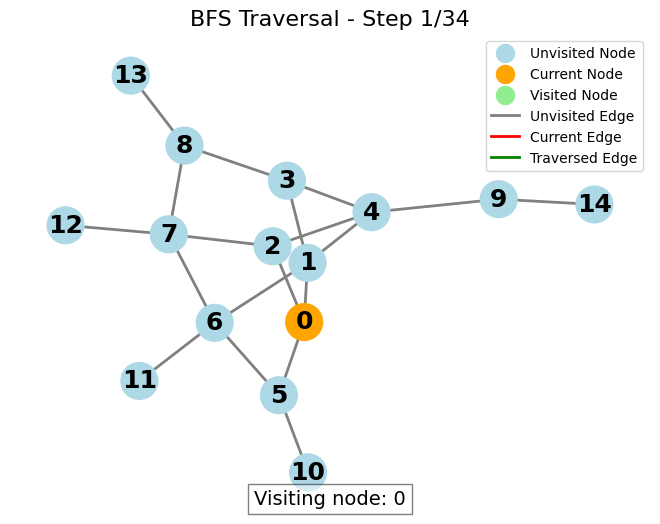

In [24]:
ani = FuncAnimation(plt.gcf(), update, frames=len(traversal_steps), interval=1000, repeat=True)

ani.save('bfs_traversal.mp4', writer='ffmpeg', fps=1)

## Analysis

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import tracemalloc
import pandas as pd
from collections import deque

In [26]:
def generate_sparse_graph(n):
    return nx.gnm_random_graph(n, n-1, seed=42)

In [27]:
def generate_dense_graph(n):
    return nx.gnm_random_graph(n, n*(n-1)//2, seed=42)

In [28]:
def generate_grid_graph(n):
    side = int(n**0.5)
    G = nx.grid_2d_graph(side, side)
    G = nx.convert_node_labels_to_integers(G)
    return G

In [29]:
def generate_cycle_graph(n):
    return nx.cycle_graph(n)

In [30]:

def generate_star_graph(n):
    return nx.star_graph(n-1)

In [31]:
def generate_complete_graph(n):
    return nx.complete_graph(n)

In [32]:
def generate_barabasi_graph(n):
    return nx.barabasi_albert_graph(n, max(1, n//10))

In [33]:
def generate_watts_strogatz_graph(n):
    return nx.watts_strogatz_graph(n, k=4, p=0.3)

In [34]:
def assign_random_weights(G):
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.randint(1, 10)
    return G

In [35]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next_node in set(graph[start]) - visited:  # Convert AtlasView to set
        dfs(graph, next_node, visited)
    return visited

In [36]:
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            queue.extend(set(graph[node]) - visited)  # Convert AtlasView to set
    return visited


In [37]:
def measure_search_performance(G, algorithm, start_node=0):
    tracemalloc.start()
    start_time = time.perf_counter()
    if algorithm == 'dfs':
        visited = dfs(G, start_node)
    elif algorithm == 'bfs':
        visited = bfs(G, start_node)
    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return (end_time - start_time), peak / 1024  # Return time and memory in KB


In [38]:
def plot_graph(G, title, ax):
    pos = nx.spring_layout(G, seed=42)
    weights = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, ax=ax)
    ax.set_title(title)

        Graph Type  Size  DFS Time (s)  DFS Memory (KB)  BFS Time (s)  \
0           Sparse    50      0.000480         7.281250      0.000409   
1            Dense    50      0.009265        87.429688      0.000972   
2             Grid    50      0.000781        11.109375      0.000269   
3            Cycle    50      0.000362        16.031250      0.000339   
4             Star    50      0.000215         4.984375      0.000274   
5         Complete    50      0.009921        87.632812      0.000601   
6         Barabasi    50      0.001418        23.343750      0.000358   
7   Watts-Strogatz    50      0.000586        13.750000      0.000316   
8           Sparse   100      0.000612        12.750000      0.000391   
9            Dense   100      0.075878       260.601562      0.002357   
10            Grid   100      0.001303        24.156250      0.000601   
11           Cycle   100      0.001026        35.703125      0.000575   
12            Star   100      0.000497        14.48

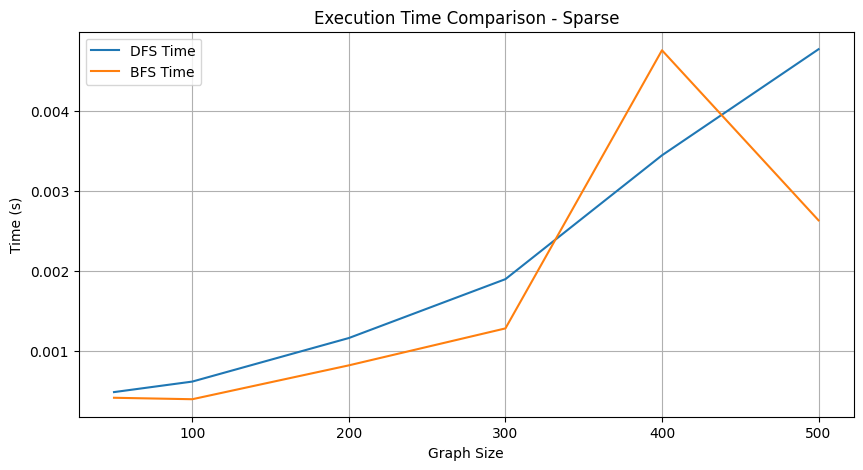

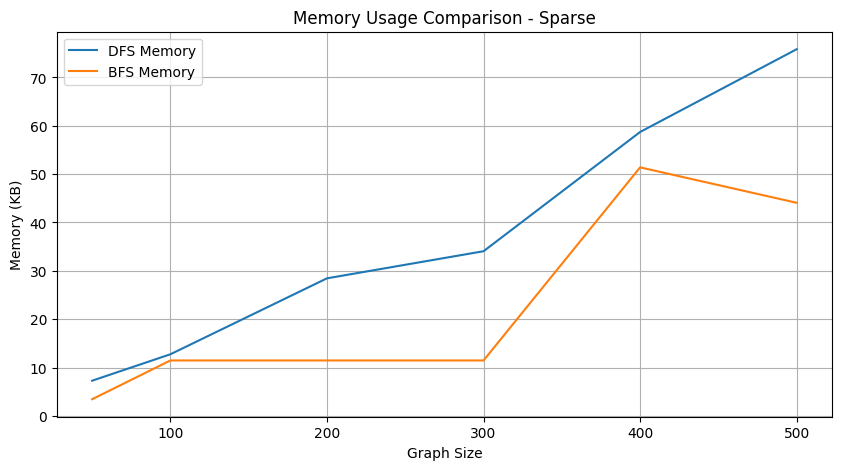

[Time] BFS outperforms DFS in Sparse starting from size 50
[Memory] BFS uses less memory than DFS in Sparse starting from size 50


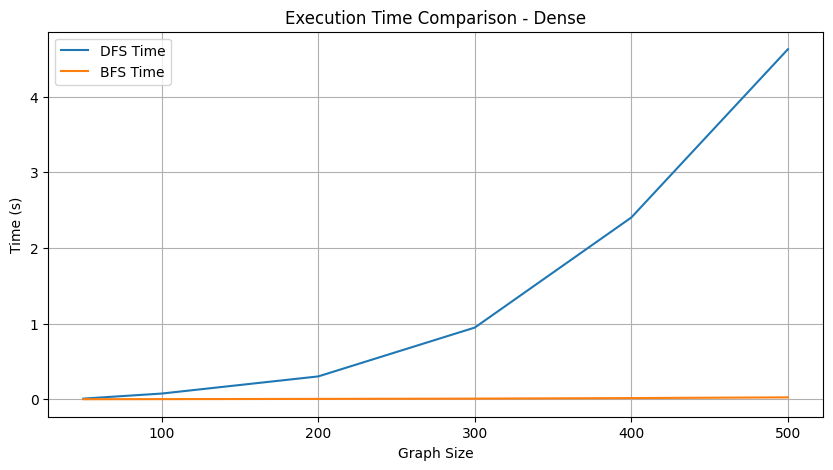

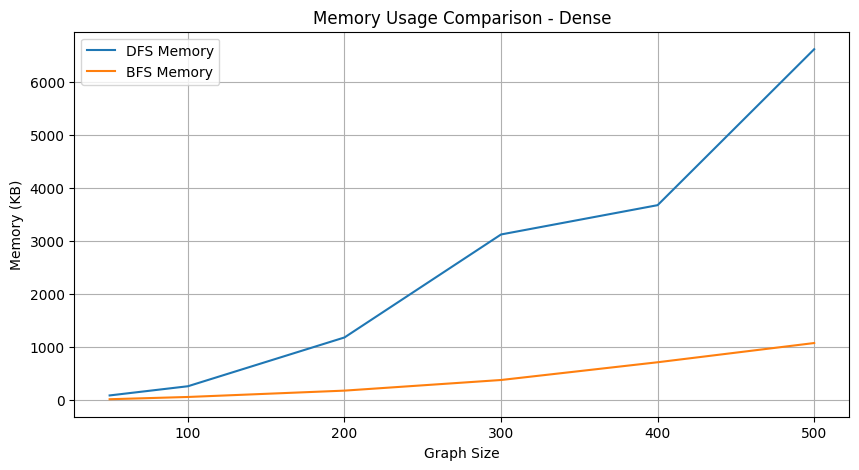

[Time] BFS outperforms DFS in Dense starting from size 50
[Memory] BFS uses less memory than DFS in Dense starting from size 50


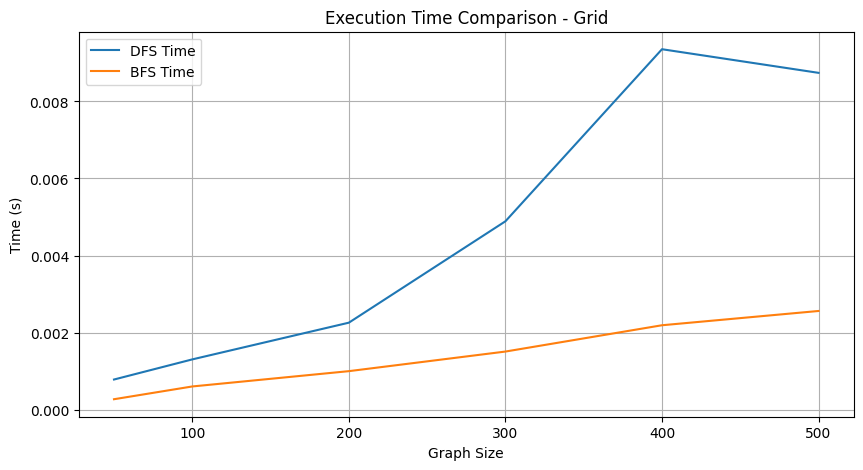

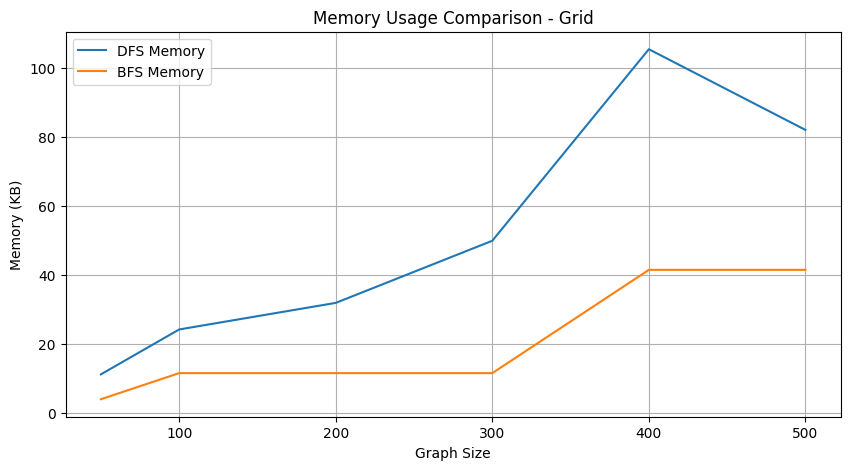

[Time] BFS outperforms DFS in Grid starting from size 50
[Memory] BFS uses less memory than DFS in Grid starting from size 50


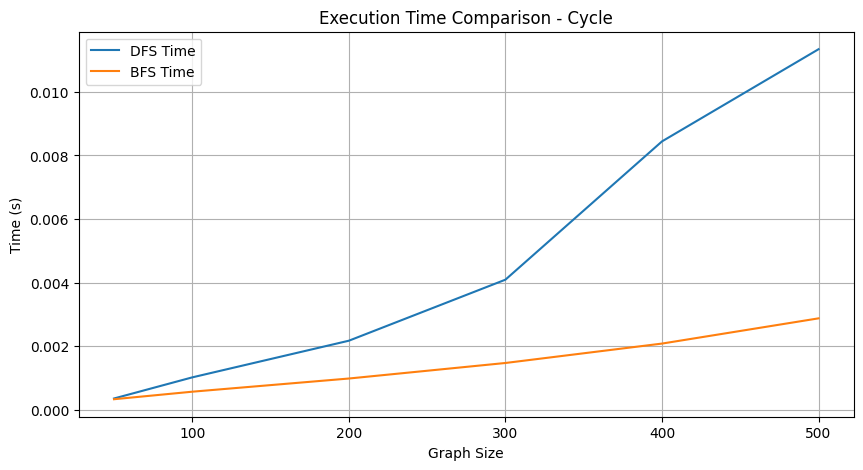

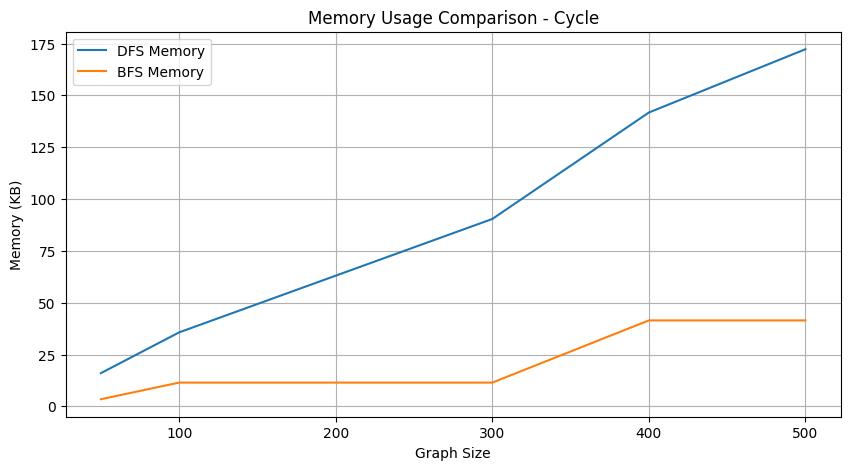

[Time] BFS outperforms DFS in Cycle starting from size 50
[Memory] BFS uses less memory than DFS in Cycle starting from size 50


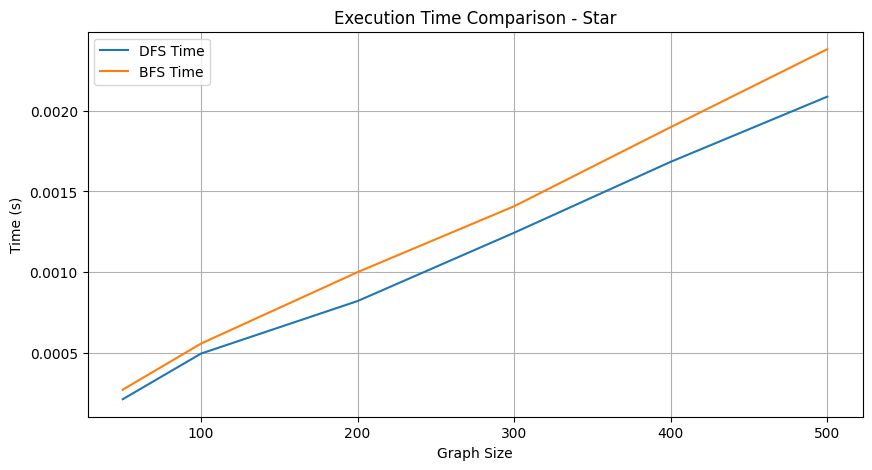

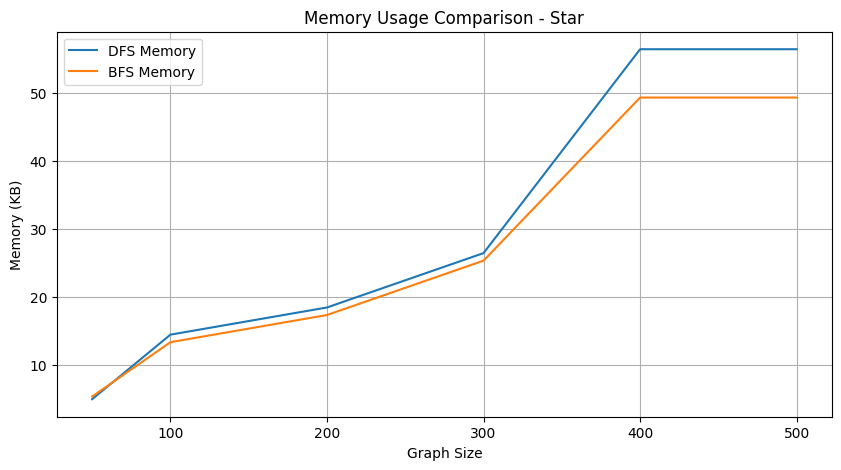

[Memory] BFS uses less memory than DFS in Star starting from size 100


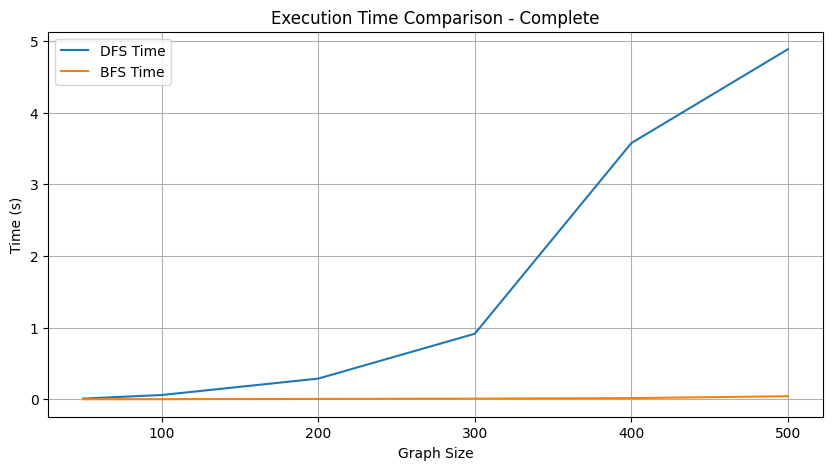

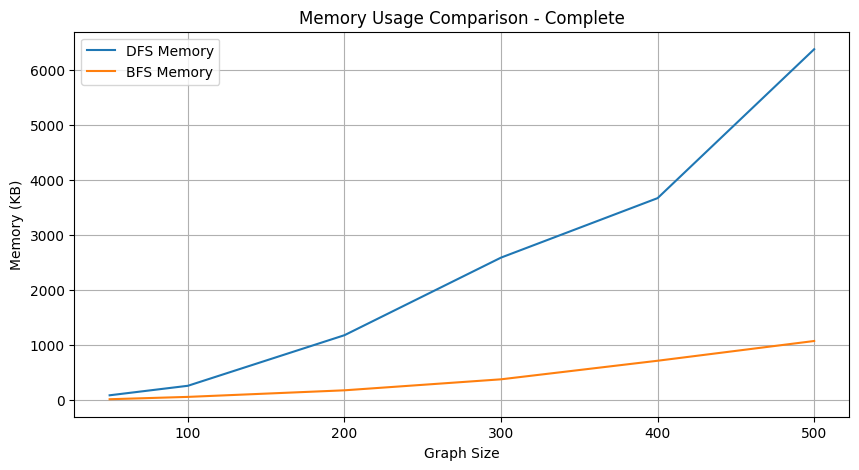

[Time] BFS outperforms DFS in Complete starting from size 50
[Memory] BFS uses less memory than DFS in Complete starting from size 50


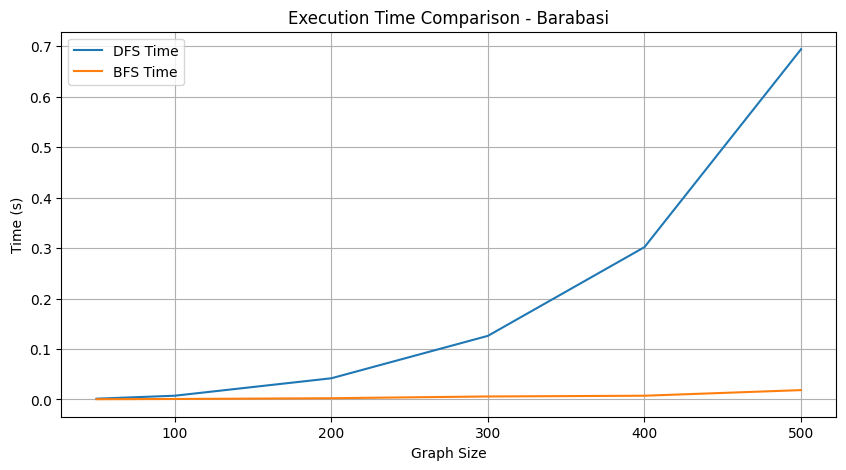

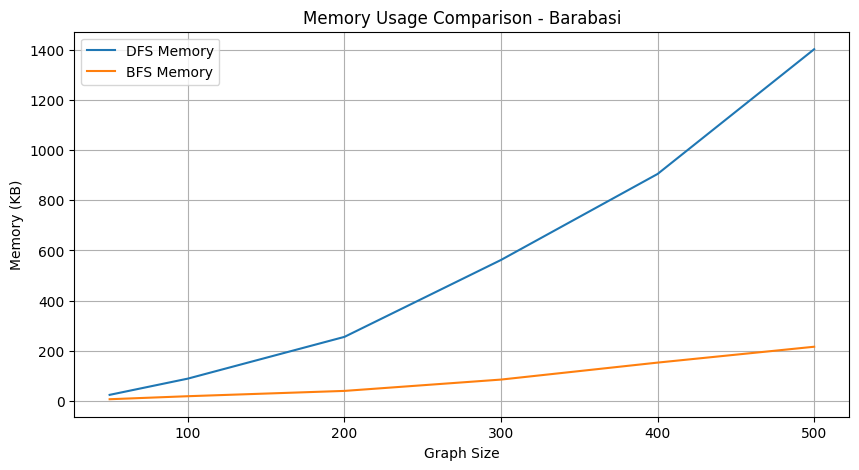

[Time] BFS outperforms DFS in Barabasi starting from size 50
[Memory] BFS uses less memory than DFS in Barabasi starting from size 50


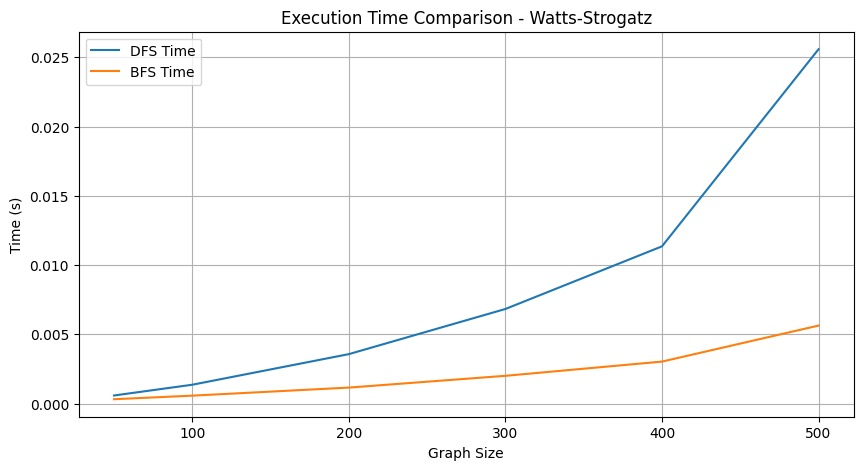

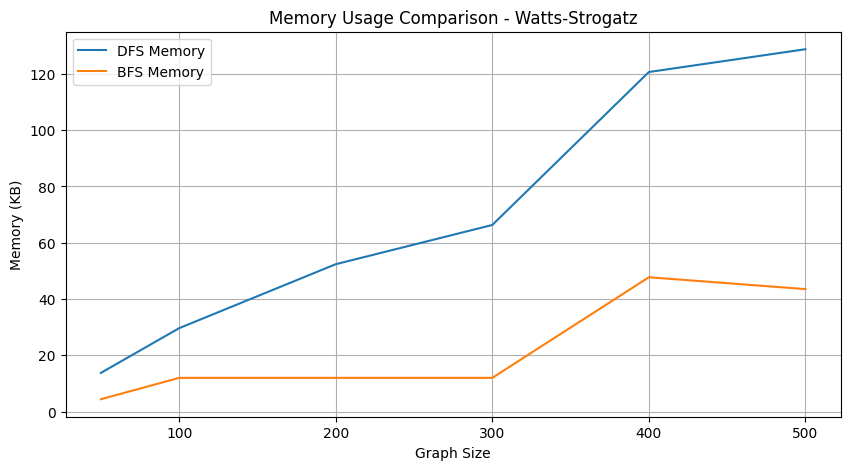

[Time] BFS outperforms DFS in Watts-Strogatz starting from size 50
[Memory] BFS uses less memory than DFS in Watts-Strogatz starting from size 50


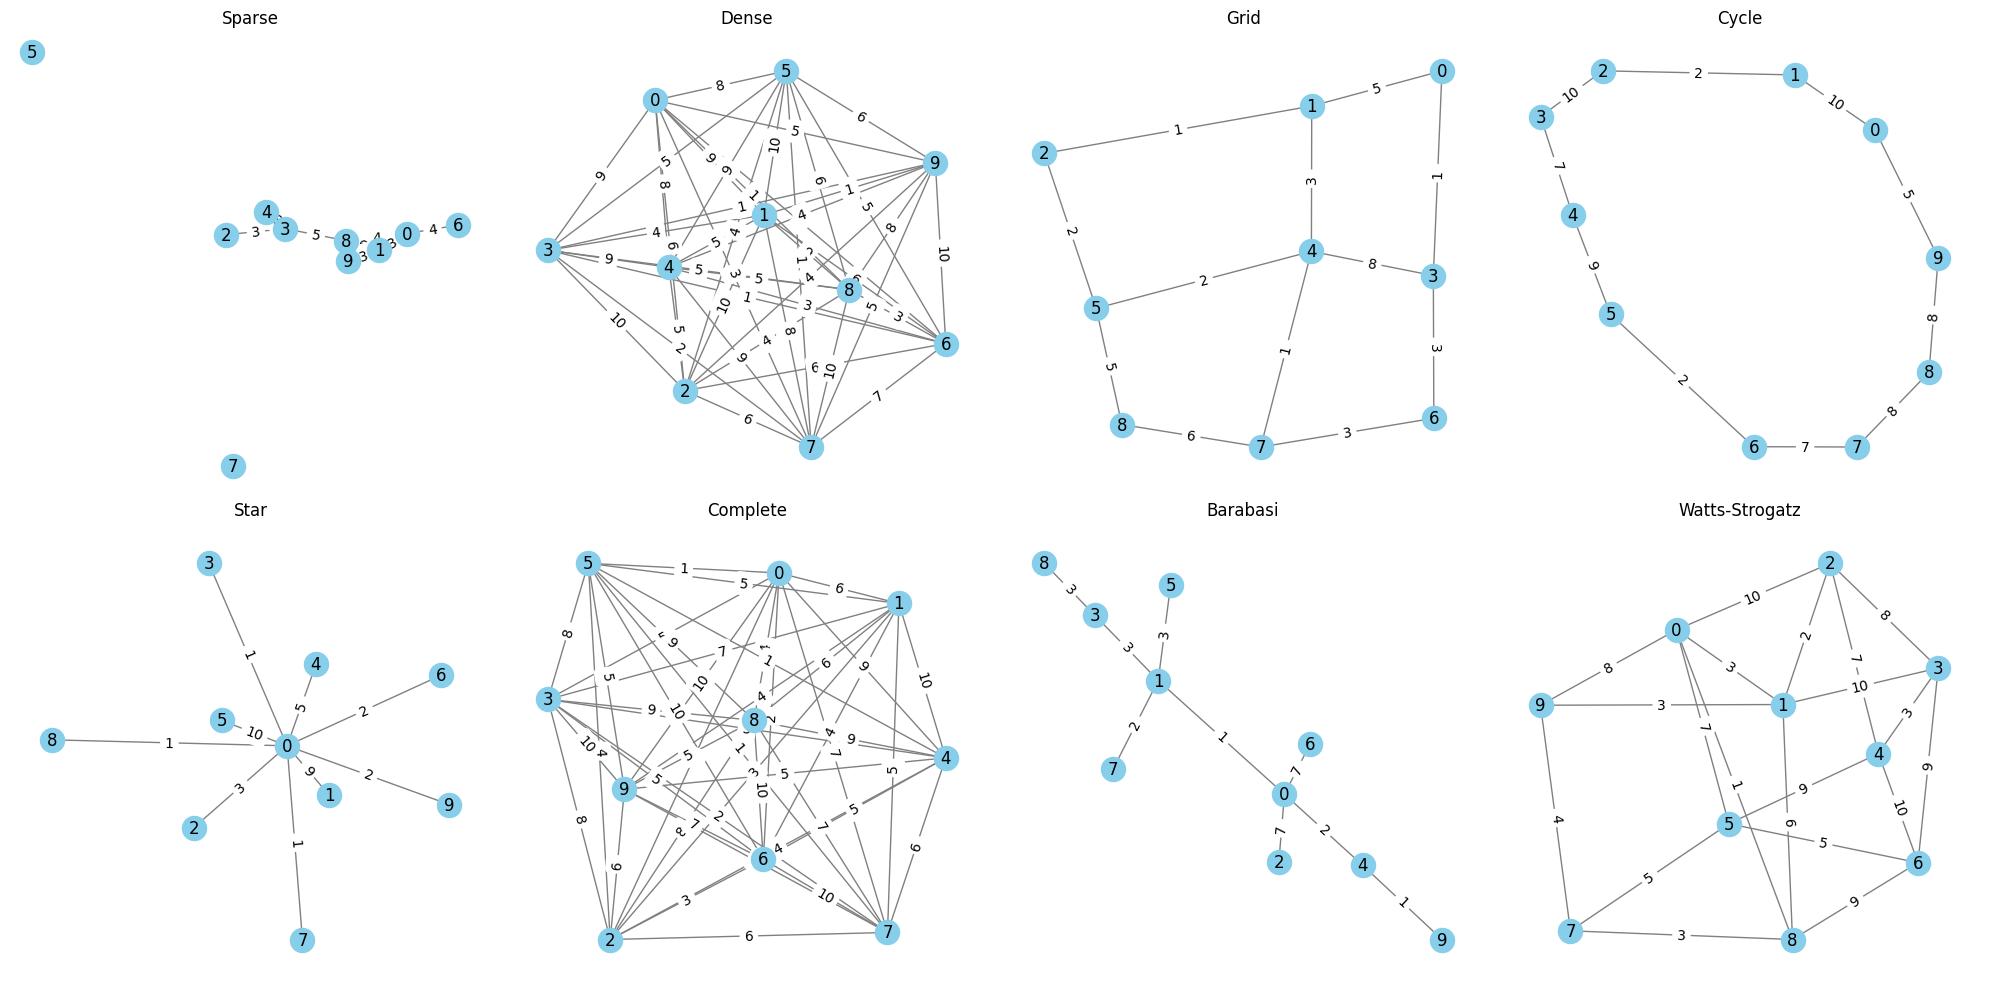

In [39]:
graph_types = {
    'Sparse': generate_sparse_graph,
    'Dense': generate_dense_graph,
    'Grid': generate_grid_graph,
    'Cycle': generate_cycle_graph,
    'Star': generate_star_graph,
    'Complete': generate_complete_graph,
    'Barabasi': generate_barabasi_graph,
    'Watts-Strogatz': generate_watts_strogatz_graph
}

sizes = [50, 100, 200, 300, 400, 500]

results = []


for size in sizes:
    for graph_name, graph_func in graph_types.items():
        G = graph_func(size)
        G = assign_random_weights(G)
        t_dfs, m_dfs = measure_search_performance(G, 'dfs')
        t_bfs, m_bfs = measure_search_performance(G, 'bfs')
        results.append({
            'Graph Type': graph_name,
            'Size': size,
            'DFS Time (s)': t_dfs,
            'DFS Memory (KB)': m_dfs,
            'BFS Time (s)': t_bfs,
            'BFS Memory (KB)': m_bfs
        })

df = pd.DataFrame(results)
print(df)

for graph_type in df['Graph Type'].unique():
    subdf = df[df['Graph Type'] == graph_type]
    plt.figure(figsize=(10, 5))
    plt.plot(subdf['Size'], subdf['DFS Time (s)'], label='DFS Time')
    plt.plot(subdf['Size'], subdf['BFS Time (s)'], label='BFS Time')
    plt.title(f'Execution Time Comparison - {graph_type}')
    plt.xlabel('Graph Size')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(subdf['Size'], subdf['DFS Memory (KB)'], label='DFS Memory')
    plt.plot(subdf['Size'], subdf['BFS Memory (KB)'], label='BFS Memory')
    plt.title(f'Memory Usage Comparison - {graph_type}')
    plt.xlabel('Graph Size')
    plt.ylabel('Memory (KB)')
    plt.legend()
    plt.grid(True)
    plt.show()

    better_time = subdf[subdf['BFS Time (s)'] < subdf['DFS Time (s)']]
    better_mem = subdf[subdf['BFS Memory (KB)'] < subdf['DFS Memory (KB)']]
    if not better_time.empty:
        print(f"[Time] BFS outperforms DFS in {graph_type} starting from size {better_time.iloc[0]['Size']}")
    if not better_mem.empty:
        print(f"[Memory] BFS uses less memory than DFS in {graph_type} starting from size {better_mem.iloc[0]['Size']}")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, (graph_name, graph_func) in enumerate(graph_types.items()):
    G = graph_func(10)
    G = assign_random_weights(G)
    plot_graph(G, graph_name, axes[idx])

plt.tight_layout()
plt.show()